# Assignment 3 

### MACS 30000, Dr. Evans
### Sixue Liu

Due Wednesday, Oct.24 at 11:30 AM

### 1. Simulation in Sociology, Moretti (2002)

See the attached PDF. 

### 2. Simulating your income

(a) Assume you will work for 40 years after you graduate (2020 to 2059). Simulate 10,000 different realizations of your lifetime income. 

In [1]:
# import initial packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pandas as pd 

In [2]:
def lognormal_income_sim(p):
    np.random.seed(524)
    ln_errors_mat = np.zeros((p['num_draws'], p['work_years']))
    for draw in range(p['num_draws']):
        income_errors = np.random.lognormal(p['mean'], p['sd'], p['work_years'])
        ln_errors_mat[draw, :] = np.log(income_errors)
    ln_errors_mat = np.transpose(ln_errors_mat)
    
    #create a matrix of dim(lf_years, num_draws)
    ln_income_mat = np.zeros((p['work_years'], p['num_draws']))
    
    #fill the matrix
    ln_income_mat[0, :] = np.log(p['inc0']) + ln_errors_mat[0, :]

    #loop and apply model
    for yr in range(1, p['work_years']):
        ln_income_mat[yr, :] = (1 - 0.4) * (np.log(p['inc0']) + p['gr'] * yr) + 0.4 * ln_income_mat[yr-1, :] + ln_errors_mat[yr, :]
    
    income_mat = np.exp(ln_income_mat)
    return income_mat

In [3]:
simulation_profile = {
    'mean' : 0,             # mean for ln(errors)
    'sd' : 0.13,            # standard deviation for ln(errors)
    'inc0' : 80000,         # starting income
    'gr' : 0.025,           # growth rate 
    'work_years' : 40,      # working years
    'num_draws' : 10000,    # simulations 
    'st_year' : 2020        # start year 
}

income_mat = lognormal_income_sim(simulation_profile)
print(income_mat)

[[ 66409.15585396  87090.02361606  77964.9128787  ...  82615.14768903
   73060.280769    96185.73700534]
 [ 92599.54181011 110753.4836433   75396.13433933 ...  91033.55488888
   72981.70901205  93862.20664804]
 [111373.07206917  94963.7575539   79613.59599191 ...  89798.18450708
   88417.6480529  101046.98628708]
 ...
 [184381.71271416 225888.14811901 207083.55365427 ... 256618.44418765
  192277.34637423 220022.33445344]
 [232334.57698127 193323.26525541 178471.60929258 ... 294250.66877047
  167032.88455955 234668.51878321]
 [224611.55424288 233696.52700494 190202.35706111 ... 290792.67259199
  196285.97182101 233683.64036871]]


Plot one of the lifetime income paths.

Text(0,0.5,'Annual income (\\$s)')

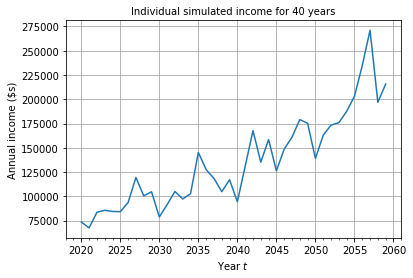

In [4]:
%matplotlib inline
p = simulation_profile
year_vec = np.arange(p['st_year'], p['st_year'] + p['work_years'])
individual = 500
fig, ax = plt.subplots()
plt.plot(year_vec, income_mat[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b = True, which = 'major', color = '0.65', linestyle = '-')
plt.title('Individual simulated income for 40 years', fontsize = 10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual income (\$s)')

(b) Plot a histogram with 50 bins of year t = 2020 initial income for each of the 10,000 simulations.

Text(0.5,1,'Number of Respondents in Income Bins')

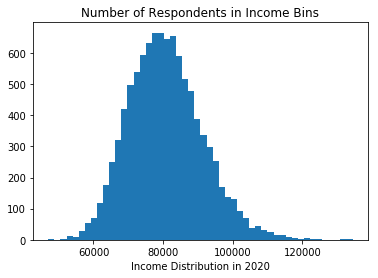

In [12]:
plt.hist(income_mat[0, :], bins = 50)
plt.xlabel("Income Distribution in 2020")
plt.title("Number of Respondents in Income Bins")

In [7]:
print(income_mat[0, :])

[66409.15585396 87090.02361606 77964.9128787  ... 82615.14768903
 73060.280769   96185.73700534]


In [8]:
from scipy import stats
percent1 = 100 - stats.percentileofscore(income_mat[0, :], 100000)
percent2 = stats.percentileofscore(income_mat[0, :], 70000)
print(percent1)
print(percent2)

4.510000000000005
15.19


From my simulation, around 4.51% of our class will earn more than 100,000 dollars in the first year out of this program. And about 15.19% of our class will earn less than 70,000 dollars in the first year. I think this distribution is roughly normal distribution, with a little bit skewed. We may use larger number of simulation or more bins to make it more normally ditributed.  

(c) Plot the histogram of how many years it takes to pay off the loan in each of your 10,000 simulations. In what percent of the simulations are you able to pay off the loan in 10 years (on or before t = 2029).

76.46 percent of the simulations will be able to pay off the loan in 10 years.


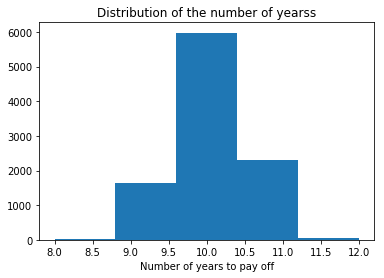

In [14]:
years_to_pay_off = []
for i in range(p['num_draws']):
    year = 0
    amount = 0
    income = income_mat[:, i]
    for inc in income:
        amount += inc * 0.1
        if amount < 95000:
            year = year + 1
        else:
            break
    years_to_pay_off.append(year)

years_to_pay_off = np.asarray(years_to_pay_off)
plt.hist(years_to_pay_off, bins = 5)
plt.xlabel("Number of years to pay off")
plt.title("Distribution of the number of yearss")

from scipy import stats
percent = stats.percentileofscore(years_to_pay_off, 10.5)
print(percent, "percent of the simulations will be able to pay off the loan in 10 years.")

(d) Plot the new histogram of how many years it takes to pay off your loan of $95,000 in your new 10,000 simulations with the new standard deviation and the new average initial salary. In what percent of the simulations are you able to pay off the loan in 10 years (on or before t = 2029)?

In [10]:
simulation_profile_new = {
    'mean' : 0,             # mean for ln(errors)
    'sd' : 0.17,            # standard deviation for ln(errors)
    'inc0' : 90000,         # starting income
    'gr' : 0.025,           # growth rate 
    'work_years' : 40,      # working years
    'num_draws' : 10000,    # simulations 
    'st_year' : 2020        # start year 
}

income_mat_new = lognormal_income_sim(simulation_profile_new)

In the new circumstance, 98.16 percent of the simulations will be able to pay off the loan in 10 years.


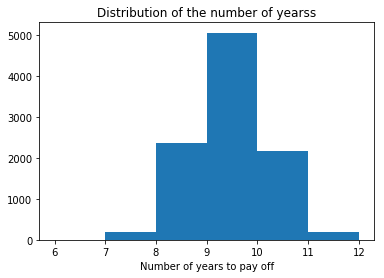

In [16]:
years_to_pay_off_new = []
for i in range(p['num_draws']):
    year = 0
    amount = 0
    income_new = income_mat_new[:, i]
    for inc in income_new:
        amount += inc * 0.1
        if amount < 95000:
            year = year + 1
        else:
            break
    years_to_pay_off_new.append(year)

years_to_pay_off_new = np.asarray(years_to_pay_off_new)
plt.hist(years_to_pay_off_new, bins = 6)
plt.xlabel("Number of years to pay off")
plt.title("Distribution of the number of yearss")

from scipy import stats
percent = stats.percentileofscore(years_to_pay_off_new, 10.5)
print("In the new circumstance,", percent, "percent of the simulations will be able to pay off the loan in 10 years.")